In [1]:
"""
Authors: Mariusz Krzyzopolski s21544 Tomasz Baj s20499
"""

'\nAuthors: Mariusz Krzyzopolski s21544 Tomasz Baj s20499\n'

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import os
import time

In [ ]:
"""Checking available GPU with CUDA for training"""
tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [4]:
""" Prepare test and train datasets """
df = pd.read_csv("beer_reviews.csv")
df.head()

beer_style = df.iloc[:, 7].unique().tolist()
beer_style.sort()
id_map = {value: idx+1 for idx, value in enumerate(beer_style)}
df['beer_style'] = df['beer_style'].map(id_map)

df = df[:10000].dropna()

X_train = df.iloc[:, [3, 4, 5, 8, 9, 11]].to_numpy()
y_train = df.iloc[:, 7].to_numpy().reshape(-1, 1)
X_test = df.iloc[:, [3, 4, 5, 8, 9, 11]].to_numpy()
y_test = df.iloc[:, 7].to_numpy().reshape(-1, 1)

In [ ]:
"""Creation and compilation of custom model, adjusted to fashion Ionosphere dataset problem"""
normalizer = keras.layers.Normalization()
normalizer.adapt(X_train)
model = keras.Sequential([
    normalizer,
    keras.layers.InputLayer(input_shape=(6,)),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(len(beer_style)+1, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
"""Train model with base time benchmark"""
start = time.time()
history = model.fit(X_train, y_train, epochs=100)
print("time: ", time.time()-start, "s")

Epoch 1/100


2022-12-17 00:04:47.292357: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x5617e78e3370 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-12-17 00:04:47.292381: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2070, Compute Capability 7.5
2022-12-17 00:04:47.296025: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2022-12-17 00:04:47.374576: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-17 00:04:47.419718: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


296/296 [==============================] - 3s 4ms/step - loss: 2.6167 - accuracy: 0.3663
Epoch 2/100
296/296 [==============================] - 1s 4ms/step - loss: 2.1780 - accuracy: 0.4319
Epoch 3/100
296/296 [==============================] - 1s 4ms/step - loss: 2.0346 - accuracy: 0.4596
Epoch 4/100
296/296 [==============================] - 1s 4ms/step - loss: 1.9448 - accuracy: 0.4744
Epoch 5/100
296/296 [==============================] - 1s 4ms/step - loss: 1.8843 - accuracy: 0.4867
Epoch 6/100
296/296 [==============================] - 1s 4ms/step - loss: 1.8154 - accuracy: 0.5037
Epoch 7/100
296/296 [==============================] - 1s 3ms/step - loss: 1.7565 - accuracy: 0.5135
Epoch 8/100
296/296 [==============================] - 1s 3ms/step - loss: 1.7142 - accuracy: 0.5192
Epoch 9/100
296/296 [==============================] - 1s 3ms/step - loss: 1.6572 - accuracy: 0.5315
Epoch 10/100
296/296 [==============================] - 1s 4ms/step - loss: 1.6146 - accuracy: 0.5380
E

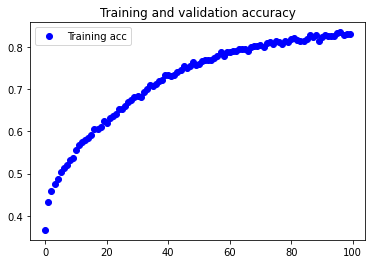

296/296 - 1s - loss: 0.4191 - accuracy: 0.8544 - 567ms/epoch - 2ms/step

Test accuracy: 0.854426383972168


In [7]:
import matplotlib.pyplot as plt
"""Benchmark of accuracy, with dependency of epoch"""
plt.plot(list(range(100)), history.history["accuracy"], 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)